## CARREGANDO DATASET DO GITHUB

In [3]:
import zipfile

!git clone https://github.com/andrehochuli/teaching.git
!unzip /content/teaching/datasets/digits.zip

# BIBLIOTECAS

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from tqdm import tqdm

from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# MONTANDO O DATASET

In [ ]:
DATASET_DIRECTORY = '/content/digits'
IMG_SIZE = 28

#### MONTANDO ARRAY DE LABELS BASEADO NO NOME DAS PASTAS

In [ ]:
LABELS = []

for dir_name in range(len(os.listdir(DATASET_DIRECTORY))):
    LABELS.append(os.listdir(DATASET_DIRECTORY)[dir_name])

print(LABELS)

#### MONTANDO ARRAY DE IMAGENS

In [ ]:
training_data = []

def create_training_data():
    for category in LABELS:

        path = os.path.join(DATASET_DIRECTORY,category)
        class_num = LABELS.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print("erro")
                pass

create_training_data()

print(len(training_data))

#### EMBARALHA OS DADOS [X, Y]

In [25]:
random.shuffle(training_data)

#### SEPARANDO IMG E LABEL

In [26]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x)
x.shape
# # print(type(x), type(y))

(70000, 28, 28)

#### VISUALIZAÇÃO

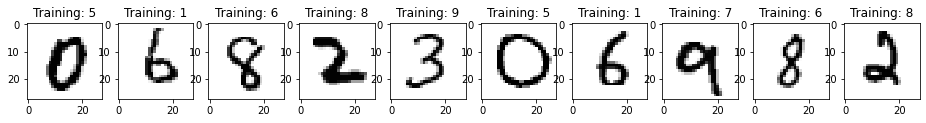

In [27]:
# print("Y:", y[5000], "\nX:")
# plt.imshow(x[5000], cmap='gray')
# plt.show()


_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 4))
for ax, image, label in zip(axes, x, y):
#     ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

#### SALVAR DATASET

In [28]:
pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

#### CARREGAR DATASET

In [29]:
pickle_in = open('x.pickle', 'rb')
x = pickle.load(pickle_in)

#### FLATTENING

In [30]:
n_samples = len(x)
data = x.reshape((n_samples, -1))

pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### PROBLEMA COM O DESEMPACOTAMENTO DA FUNÇÃO TTS

In [31]:
y = np.array(y)
y.shape
y = y.reshape((n_samples, ))
y

array([5, 1, 6, ..., 2, 7, 0])

In [32]:
# 70K linhas (quantidade de img)
# 784 colunas (28x28 - tamanho da img)

print("Original:", x.shape, "\nReshaped:", data.shape)
print(type(x), type(data))

Original: (70000, 28, 28) 
Reshaped: (70000, 784)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### TRAIN TEST SPLIT FUNCTION

In [33]:
# 10k Teste
# int(len(x)*.143)

def TrainTestSplitter(x_values: np.ndarray, y_values: np.ndarray, test_size = .143):
    try:
        xy_concat_df = pd.concat([pd.DataFrame(x_values), pd.DataFrame(y_values)], axis = 1)  # junta x e y
        slice_val = int(len(xy_concat_df) * test_size)  # corta os dados embaralhados
        test_df, train_df = xy_concat_df[:slice_val], xy_concat_df[slice_val:]  # separa test (de 0 a 10k) e train (de 10k a 70k)

        return train_df.iloc[:, :-1], train_df.iloc[:, -1:], test_df.iloc[:, :-1], test_df.iloc[:, -1:]
        # train_x, train_y, test_x, test_y
    
    except:
        print('Erro de data type!')
        
        

# loc, iloc? https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87

#### SEPARANDO EM TRAIN E TEST

In [34]:
train_x, train_y, test_x, test_y = TrainTestSplitter(data, y)

#### PROBLEMA DE DIMENSÕES NO SVM

In [35]:
n_samples_train_y = len(train_y)

train_y = np.array(train_y)
train_y = train_y.reshape((n_samples_train_y, ))

print(train_y, type(train_y))

[9 4 5 ... 2 7 0] <class 'numpy.ndarray'>


# Support Vector Classification - SVC

#### CONSTRUÇÃO DO MODELO

In [ ]:
model_svm = SVC(gamma='auto')
model_svm.fit(train_x, train_y)

#### PREDIÇÃO

In [ ]:
y_test_pred_svm = model_svm.predict(test_x)

#### VISUALIZAÇÃO DA PREDIÇÃO

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 4))
for ax, image, actual, prediction in zip(axes, test_x, test_y, y_test_pred_svm):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}\n Actual: {actual}')

# DecisionTreeClassifier

In [ ]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(train_x, train_y)

In [ ]:
y_test_pred_dtc = model_dtc.predict(test_x)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 4))
for ax, image, actual, prediction in zip(axes, test_x, test_y, y_test_pred_dtc):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}\n Actual: {actual}')

# Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(train_x, train_y)

In [ ]:
y_test_pred_lr = model_lr.predict(test_x[0].reshape(1,-1))

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 4))
for ax, image, actual, prediction in zip(axes, test_x, test_y, y_test_pred_lr):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}\n Actual: {actual}')

# KNeighbors Classifier

In [ ]:
model_knc = KNeighborsClassifier(n_neighbors=3)
model_knc.fit(train_x, train_y)

In [ ]:
y_test_pred_knc = model_knc.predict(test_x)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 4))
for ax, image, actual, prediction in zip(axes, test_x, test_y, y_test_pred_knc):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}\n Actual: {actual}')

# MultinomialNB

In [ ]:
model_mnb = MultinomialNB()
model_mnb.fit(train_x, train_y)

In [ ]:
y_test_pred_mnb = model_mnb.predict(test_x)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 4))
for ax, image, actual, prediction in zip(axes, test_x, test_y, y_test_pred_mnb):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}\n Actual: {actual}')

# MLP Classifier

In [ ]:
model_mlpc = MLPClassifier()
model_mlpc.fit(train_x, train_y)

In [ ]:
y_test_pred_mlpc = model_mlpc.predict(test_x)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 4))
for ax, image, actual, prediction in zip(axes, test_x, test_y, y_test_pred_mlpc):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}\n Actual: {actual}')

----

# Acurácia

In [ ]:
accuracy_svm = accuracy_score(test_y, y_test_pred_svm)
accuracy_dtc = accuracy_score(test_y, y_test_pred_dtc)
accuracy_lr = accuracy_score(test_y, y_test_pred_lr)
accuracy_knc = accuracy_score(test_y, y_test_pred_knc)
accuracy_mlpc = accuracy_score(test_y, y_test_pred_mlpc)
accuracy_mnb = accuracy_score(test_y, y_test_pred_mnb)

print('Accuracy (SVC): ', round(accuracy_svm, 3) )
print('Accuracy (Decision Tree Classifier): ', round(y_test_pred_dtc, 3) )
print('Accuracy (Logistic Regression) ', round(y_test_pred_lr, 3) )
print('Accuracy (KNeighbors Classifier): ', round(y_test_pred_knc, 3) )
print('Accuracy (MLP Classifier): ', round(y_test_pred_mlpc, 3) )
print('Accuracy (Multinomial NB): ', round(y_test_pred_mnb, 3) )

# MATRIZ DE CONFUSÃO

In [ ]:
svm_cm = plot_confusion_matrix(model_svm, test_x, test_y)
svm_cm.figure_.suptitle("Confusion Matrix SVC")
print(f"Confusion matrix SVC:\n{svm_cm.confusion_matrix}")
plt.show()

svm_cm = plot_confusion_matrix(model_dtc, test_x, test_y)
svm_cm.figure_.suptitle("Confusion Matrix DecisionTreeClassifier")
print(f"Confusion matrix DecisionTreeClassifier:\n{svm_cm.confusion_matrix}")
plt.show()

svm_cm = plot_confusion_matrix(model_lr, test_x, test_y)
svm_cm.figure_.suptitle("Confusion Matrix LogisticRegression")
print(f"Confusion matrix LogisticRegression:\n{svm_cm.confusion_matrix}")
plt.show()

svm_cm = plot_confusion_matrix(model_knc, test_x, test_y)
svm_cm.figure_.suptitle("Confusion Matrix KNeighborsClassifier")
print(f"Confusion matrix KNeighborsClassifier:\n{svm_cm.confusion_matrix}")
plt.show()

svm_cm = plot_confusion_matrix(model_mlpc, test_x, test_y)
svm_cm.figure_.suptitle("Confusion Matrix MLPClassifier")
print(f"Confusion matrix MLPClassifier:\n{svm_cm.confusion_matrix}")
plt.show()

svm_cm = plot_confusion_matrix(model_mnb, test_x, test_y)
svm_cm.figure_.suptitle("Confusion Matrix MultinomialNB")
print(f"Confusion matrix MultinomialNB:\n{svm_cm.confusion_matrix}")
plt.show()


# CLASSIFICATION REPORT

In [ ]:
print("SVM\n", classification_report(y, y_test_pred_svm, target_names=LABELS))
print("DecisionTreeClassifier\n", classification_report(y, y_test_pred_dtc, target_names=LABELS))
print("LogisticRegression\n", classification_report(y, y_test_pred_lr, target_names=LABELS))
print("KNeighborsClassifier\n", classification_report(y, y_test_pred_knc, target_names=LABELS))
print("MLPClassifier\n", classification_report(y, y_test_pred_mlpc, target_names=LABELS))
print("MultinomialNB\n", classification_report(y, y_test_pred_mnb, target_names=LABELS))

----

# ANOTAÇÕES

DEFINE, FIT, PREDICT, EVALUATE

# LOGISTIC REGRESSION

Classificação Binária

ROC - Receiver Operating Characeristic
AUC - Area Under Curve

Curva ROC
Compara diferentes modelos para diferentes thresholds (limites/limiar)

(recall, specificity)


# SVM SVC
https://www.youtube.com/watch?v=_YPScrckx28

# MATIZ DE CONFUSÃO

https://www.youtube.com/watch?v=vNpD7ctJlvA
https://www.youtube.com/watch?v=vS6bQy45rdE

acurácia = tp + tn / tp + tn + fp + fn
precisão = tp / tp + fp
true positive rate | Recall = tp / tp + fn
true negative rate | Specificity = tn / tn + fp
f1 = 2 / (1/precisão + 1/recall)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
